In [112]:
#import sys, os
#sys.path.insert(0, os.path.expanduser('~/.local/lib/python3.8/site-packages'))

#import glob 
#import cremerlab.hplc

#load required pacakges (as always)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi
#import colorcet as cc
from scipy.integrate import odeint #this is the module to solve ODEs
%matplotlib inline
# Load the scipy module
import scipy.stats 
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import json
import seaborn as sns

#import met_brewer
#colors = met_brew(name="Egypt", n=4, brew_type="discrete")
colors=["#dd5129","#0f7ba2","#43b284","#fab255"] #met_brewer egypt
#colores used to indicate different carbon sources
colorlistcarbhighlight=["#d95f02","b","#7570b3","#e7298a"] #"#1b9e77"
carbhighlight=["LB","Glucose","Succinate","Acetate"]

palette = ['#9df2f2','#009292','#ffb6db','#c48efa','#6db6ff','#b6dbff','#cf8d4c','#fca651','#56bf56','#ffff6d']
carsource_list=["LB","Glu+CAA","Gly+CAA","Glucose","Maltose","Glycerol","Succinate","Fructose","Acetate"]
colorlistcarb=[colors[0],"gray","gray",colors[1],"gray","gray",colors[2],"gray",colors[3]]
alpha=0.5 #transparancy colors

In [113]:
# read in information about metabolic genes needed for growth on different carbon sources
metabolic_genes=pd.read_csv("metabolic_genes.csv")
#display(metabolic_genes.head())

# read in similarity information (comparison to lab strain K12, following Rachel's analysis)
gene_similarity=pd.read_csv("../../data/genomic_analysis/AA_SeqIDTables/2023-04-27_NCM3722AsRef.csv")
gene_similarity = gene_similarity.rename(columns={'strain': 'strain_alternative'})

#add additional information about strains
straininfo=pd.read_csv("../../data/strainlist.csv")
gene_similarity=gene_similarity.merge(straininfo,on="strain_alternative",how="left")
#display(straininfo["strain_alternative"].unique())

# merge information about genes (manually curated information)
gene_similarity=gene_similarity.merge(metabolic_genes,on="gene",how="left")
#display(gene_similarity.shape)

# merge information about genes (clusturing according to COG etc)
# ... add


#set strain as index
gene_similarity.set_index("strain",inplace=True)
#display(gene_similarity.head())

#add colume with gene names no cap
gene_similarity["gene_name"]=gene_similarity["gene"].str.lower()




In [104]:
print(gene_similarity["gene"].unique().shape)

print(gene_similarity["gene"].str.lower().unique().shape)

(4059,)
(4059,)


array(['acetate', 'glucose', 'pts', 'succinate'], dtype=object)

array(['aceA', 'aceB', 'aceK', 'ackA', 'acs', 'actP', 'pta', 'satP',
       'ptsG', 'crr', 'ptsH', 'ptsI', 'dctA'], dtype=object)

Text(0, 0.5, 'native strains')

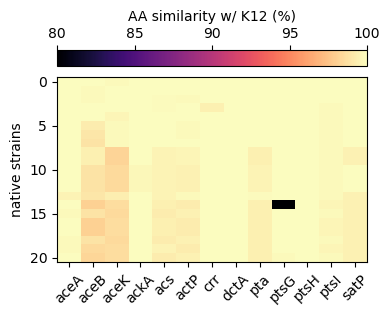

In [114]:
functionlist=["succinate",'acetate','glucose','pts']
strainselect=['ECOR01','ECOR02','ECOR09','ECOR13','ECOR15','ECOR24','ECOR26','ECOR28','ECOR35','ECOR36','ECOR38','ECOR39','ECOR41','ECOR42','ECOR51','ECOR53','ECOR54','ECOR55','ECOR59','ECOR61','ECOR63']#,'NCM3722']#,'Isolate_1', 'Isolate_2','Isolate_3','Isolate_4', 'Isolate_5', 'Isolate_6']

#select only subset of strains (e.g. those exp. characterized)
select_gene_similarity=gene_similarity.loc[strainselect]

#select only genes belonging to function of interest
select_gene_similarity=select_gene_similarity.loc[select_gene_similarity["function"].isin(functionlist)]
#sort according to function and gene
select_gene_similarity.sort_values(["function","gene"],inplace=True) 

#generate table for plotting
table_toplot = pd.pivot_table(select_gene_similarity, values='seq_id', index=['strain'], columns=['gene'], aggfunc="mean")
#display(table_toplot)

display(select_gene_similarity["function"].unique())
display(select_gene_similarity["gene"].unique())
# plot heatmap
fig, ax = plt.subplots(figsize=(4,3))
pos=ax.imshow(table_toplot,cmap='magma',aspect='auto',vmin=80)

ax.set_xticks(range(0,table_toplot.shape[1]))
ax.set_xticklabels(table_toplot.columns,rotation=45)

cb=fig.colorbar(pos, ax=ax,location='top')
cb.set_label("AA similarity w/ K12 (%)")
ax.set_ylabel("native strains")

In [ ]:
#look at categories of genes

In [131]:
genelist=pd.read_csv("../../data/ecoli_genelist_master.csv")
#display(genelist)
display(gene_similarity)

#display(genelist.shape)
display(gene_similarity.shape)


#there are double entries
display(genelist["gene_name"][genelist["gene_name"].duplicated(keep=False)].unique())
display(genelist["gene_name"][genelist["gene_name"].duplicated(keep=False)].unique().shape)
#display(gene_similarity2)
display(genelist[genelist["gene_name"].duplicated(keep=False)].sort_values("gene_name"))

#remove double entries
#display(genelist["gene_name"][genelist["gene_name"].duplicated(keep=False)])


#merge information
gene_similarity2=gene_similarity.merge(genelist,on="gene_name",how="inner")
display(gene_similarity2.shape)


,Unnamed: 0.1,Unnamed: 0,gene,strain_alternative,length,seq_id,strain_alternative2,phylum,host,sex,function,gene_alternativename,description,reference,notes,gene_name
strain,,,,,,,,,,,,,,,,
EC1,0,0,aaeA,EC1,310,100.000000,GE468,B2 III,human,NaN,NaN,NaN,NaN,NaN,NaN,aaea
EC2,1,1,aaeA,EC2,310,100.000000,GE469,B2 III,human,NaN,NaN,NaN,NaN,NaN,NaN,aaea
EC3,2,2,aaeA,EC3,310,99.677419,GE470,B2 III,human,NaN,NaN,NaN,NaN,NaN,NaN,aaea
EC4,3,3,aaeA,EC4,310,99.677419,GE471,B2 III,human,NaN,NaN,NaN,NaN,NaN,NaN,aaea
EC5,4,4,aaeA,EC5,310,99.677419,GE472,A,human,NaN,NaN,NaN,NaN,NaN,NaN,aaea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ECOR69,342921,342921,zwf,QOZB01.1,491,100.000000,QOZB01.1,B1,celebese ape,NaN,NaN,NaN,NaN,NaN,NaN,zwf
ECOR70,342922,342922,zwf,QOZC01.1,491,100.000000,QOZC01.1,C,gorilla,NaN,NaN,NaN,NaN,NaN,NaN,zwf
ECOR71,342923,342923,zwf,QOZD01.1,491,100.000000,QOZD01.1,B1,human,female,NaN,NaN,NaN,NaN,NaN,zwf


(309273, 16)

array(['fabg', 'usg', 'sipb', 'acrb', 'acre', 'envc', 'acsa', 'ade',
       'adhc', 'tpx', 'act', 'ald', 'alsb', 'arabinose mfs transporter',
       'seg', '2-dehydro-3-deoxyphosphoheptonate aldolase', 'sac', 'gppb',
       'bcsc', 'biob', 'cer', 'cap', 'pyra', 'ecfb', 'tgs', 'csda',
       'csph', '&beta; subunit', '&alpha; subunit', 'cyst', 'gena',
       'dead-box rna helicase', 'tlr', 'thyr', 'yidu', 'ftst', 'grop',
       'grpc', 'dsdc', 'sof', 'e. coli common pilus chaperone', 'ecpd',
       'ompb',
       'putative structural protein, ethanolamine utilization microcompartment',
       'fadi', 'fimd', 'fimg', 'slpa', 'fla', 'flaq', 'fpr', 'flrd',
       'ttp', 'triphosphoryl transfer protein', 'rsga', 'ftsb', 'std',
       'yefg', 'gata', 'glca', 'gox', 'yghl', 'trnagln1', 'trnagln2',
       'glyoxalase ii', 'glyd', 'ossb', 'psiq', 'aspb', 'yefa', 'gpp',
       'hopd', 'hcab', 'hcaa', 'gtra', 'hemc', 'hfla', 'hpr',
       'protein involved in utilization of dna as a carbon source

(199,)

,gene_name,b_number,gene_product,mw_fg,go_terms,cog_class,cog_letter,cog_category,cog_desc
7288,&alpha; subunit,b1264,anthranilate synthase subunit TrpE,0.000095,GO:0005829; GO:0046872; GO:0008152; GO:0003824...,metabolism,E,amino acid transport and metabolism,"anthranilate synthase, component I (EC 4.1.3.27)"
1318,&alpha; subunit,b2764,"sulfite reductase, flavoprotein subunit",0.000110,GO:0005829; GO:0000103; GO:0070401; GO:0016491...,metabolism,P,inorganic ion transport and metabolism,sulfite reductase (NADPH) alpha subunit (EC 1....
7276,&alpha; subunit,b1260,tryptophan synthase subunit &alpha;,0.000048,GO:0009507; GO:0009073; GO:0008652; GO:0006568...,metabolism,E,amino acid transport and metabolism,"tryptophan synthase, alpha chain (EC 4.2.1.20)"
6913,&alpha; subunit,b0729,succinyl-CoA synthetase subunit &alpha;,0.000049,GO:0009142; GO:0006165; GO:0006105; GO:0006104...,metabolism,C,energy production and conversion,succinyl-CoA synthetase (ADP-forming) alpha su...
7280,&beta; subunit,b1261,tryptophan synthase subunit &beta;,0.000071,GO:0042802; GO:0016829; GO:0009073; GO:0008652...,metabolism,E,amino acid transport and metabolism,"tryptophan synthase, beta chain (EC 4.2.1.20)"
...,...,...,...,...,...,...,...,...,...
4826,ygad,b2676,ribonucleoside-diphosphate reductase 2 subunit...,0.000060,GO:0046872; GO:0005737; GO:0005506; GO:0005829...,metabolism,F,nucleotide transport and metabolism,ribonucleoside-diphosphate reductase class Ib ...
2567,yghl,b4468,"glycolate dehydrogenase, putative FAD-binding ...",0.000064,GO:1903457; GO:0071949; GO:0050660; GO:0008720...,metabolism,C,energy production and conversion,glycolate oxidase FAD binding subunit
2569,yghl,b4467,"glycolate dehydrogenase, putative iron-sulfur ...",0.000075,GO:0005829; GO:0055114; GO:0005886; GO:0051539...,metabolism,C,energy production and conversion,glycolate oxidase iron-sulfur subunit
1508,yidu,b4477,DEHYDDEOXPHOSGALACT-ALDOL-MONOMER,0.000036,GO:0005829; GO:0016829; GO:0003824; GO:0034194...,metabolism,G,carbohydrate transport and metabolism,2-keto-3-deoxy-phosphogalactonate aldolase (EC...


(309830, 24)

In [ ]:
'defense mechanisms', 'function unknown', 'transcription',
       'Not Assigned',
       'secondary metabolites biosynthesis, transport, and catabolism',
       'posttranslational modification, protein turnover, chaperones',
       'general function prediction only',
       'coenzyme transport and metabolism',
       'Replication, recombination, and repair',
       'lipid transport and metabolism',
       'energy production and conversion',
       'signal transduction mechanisms',
       'cell wall/membrane/envelope biogenesis',
       'nucleotide transport and metabolism',
       'carbohydrate transport and metabolism',
       'amino acid transport and metabolism',
       'translation, ribosomal structure and biogenesis',
       'inorganic ion transport and metabolism',
       'intracellular trafficking, secretion, and vesicular transport',
       'cell motility',
       'cell cycle control, cell division, chromosome partitioning',
       'extracellular structures', 'mobilome: prophages, transposons',
       'RNA processing and modification'], dtype=object)

,Unnamed: 0.1,Unnamed: 0,gene,strain_alternative,length,seq_id,strain_alternative2,phylum,host,sex,...,notes,gene_name,b_number,gene_product,mw_fg,go_terms,cog_class,cog_letter,cog_category,cog_desc
0,0,0,aaeA,EC1,310,100.000000,GE468,B2 III,human,NaN,...,NaN,aaea,b3241,aromatic carboxylic acid efflux pump membrane ...,0.000058,GO:0022857; GO:0046942; GO:0055085; GO:0005886...,cellular processes and signaling,V,defense mechanisms,p-hydroxybenzoic acid efflux system component
1,1,1,aaeA,EC2,310,100.000000,GE469,B2 III,human,NaN,...,NaN,aaea,b3241,aromatic carboxylic acid efflux pump membrane ...,0.000058,GO:0022857; GO:0046942; GO:0055085; GO:0005886...,cellular processes and signaling,V,defense mechanisms,p-hydroxybenzoic acid efflux system component
2,2,2,aaeA,EC3,310,99.677419,GE470,B2 III,human,NaN,...,NaN,aaea,b3241,aromatic carboxylic acid efflux pump membrane ...,0.000058,GO:0022857; GO:0046942; GO:0055085; GO:0005886...,cellular processes and signaling,V,defense mechanisms,p-hydroxybenzoic acid efflux system component
3,3,3,aaeA,EC4,310,99.677419,GE471,B2 III,human,NaN,...,NaN,aaea,b3241,aromatic carboxylic acid efflux pump membrane ...,0.000058,GO:0022857; GO:0046942; GO:0055085; GO:0005886...,cellular processes and signaling,V,defense mechanisms,p-hydroxybenzoic acid efflux system component
4,4,4,aaeA,EC5,310,99.677419,GE472,A,human,NaN,...,NaN,aaea,b3241,aromatic carboxylic acid efflux pump membrane ...,0.000058,GO:0022857; GO:0046942; GO:0055085; GO:0005886...,cellular processes and signaling,V,defense mechanisms,p-hydroxybenzoic acid efflux system component
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309825,342921,342921,zwf,QOZB01.1,491,100.000000,QOZB01.1,B1,celebese ape,NaN,...,NaN,zwf,b1852,GLU6PDEHYDROG-MONOMER,0.000092,GO:0016614; GO:0005515; GO:0042802; GO:0010699...,metabolism,G,carbohydrate transport and metabolism,glucose-6-phosphate 1-dehydrogenase (EC 1.1.1.49)
309826,342922,342922,zwf,QOZC01.1,491,100.000000,QOZC01.1,C,gorilla,NaN,...,NaN,zwf,b1852,GLU6PDEHYDROG-MONOMER,0.000092,GO:0016614; GO:0005515; GO:0042802; GO:0010699...,metabolism,G,carbohydrate transport and metabolism,glucose-6-phosphate 1-dehydrogenase (EC 1.1.1.49)
309827,342923,342923,zwf,QOZD01.1,491,100.000000,QOZD01.1,B1,human,female,...,NaN,zwf,b1852,GLU6PDEHYDROG-MONOMER,0.000092,GO:0016614; GO:0005515; GO:0042802; GO:0010699...,metabolism,G,carbohydrate transport and metabolism,glucose-6-phosphate 1-dehydrogenase (EC 1.1.1.49)
309828,342924,342924,zwf,QOZE01.1,491,100.000000,QOZE01.1,B1,human,female,...,NaN,zwf,b1852,GLU6PDEHYDROG-MONOMER,0.000092,GO:0016614; GO:0005515; GO:0042802; GO:0010699...,metabolism,G,carbohydrate transport and metabolism,glucose-6-phosphate 1-dehydrogenase (EC 1.1.1.49)


array(['defense mechanisms', 'function unknown', 'transcription',
       'Not Assigned',
       'secondary metabolites biosynthesis, transport, and catabolism',
       'posttranslational modification, protein turnover, chaperones',
       'general function prediction only',
       'coenzyme transport and metabolism',
       'Replication, recombination, and repair',
       'lipid transport and metabolism',
       'energy production and conversion',
       'signal transduction mechanisms',
       'cell wall/membrane/envelope biogenesis',
       'nucleotide transport and metabolism',
       'carbohydrate transport and metabolism',
       'amino acid transport and metabolism',
       'translation, ribosomal structure and biogenesis',
       'inorganic ion transport and metabolism',
       'intracellular trafficking, secretion, and vesicular transport',
       'cell motility',
       'cell cycle control, cell division, chromosome partitioning',
       'extracellular structures', 'mobilome: 

(array([3.98757207e-04, 3.98757207e-04, 8.80588831e-04, 4.65216741e-04,
        4.98446508e-04, 3.82142323e-04, 7.47669763e-04, 6.31365577e-04,
        3.48912556e-04, 1.22950139e-03, 4.31986974e-04, 2.82453021e-04,
        5.81520926e-04, 4.48601858e-04, 1.39565022e-03, 4.81831625e-04,
        8.97203715e-04, 1.52856929e-03, 1.67810324e-03, 1.69471813e-03,
        1.49533953e-03, 1.03012278e-03, 1.62825859e-03, 1.56179906e-03,
        9.30433482e-04, 5.81520926e-04, 2.55869208e-03, 1.04673767e-03,
        9.30433482e-04, 1.37903534e-03, 8.63973948e-04, 1.37903534e-03,
        1.32919069e-03, 6.14750694e-04, 1.14642697e-03, 7.64284646e-04,
        1.77779255e-03, 9.47048366e-04, 7.64284646e-04, 1.17965674e-03,
        1.36242046e-03, 1.04673767e-03, 1.77779255e-03, 1.97717115e-03,
        1.91071162e-03, 1.74456278e-03, 2.17654975e-03, 6.47980461e-04,
        2.50884743e-03, 1.44549487e-03, 1.94394138e-03, 2.50884743e-03,
        2.94083440e-03, 2.80791533e-03, 2.29285394e-03, 1.960556

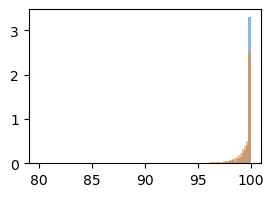

In [144]:
#plot gene variety

display(gene_similarity2)
fig,ax = plt.subplots(1,1,figsize=(3,2))
display(gene_similarity2["cog_category"].unique())

ax.hist(gene_similarity2.loc[gene_similarity2["cog_category"]=='translation, ribosomal structure and biogenesis']['seq_id'],range=(80,100),bins=100,alpha=0.5,density=True)
ax.hist(gene_similarity2['seq_id'],range=(80,100),bins=100,alpha=0.5,density=True)

